# 3. Exploratory Data Analysis

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [9]:
#Load Data
df_cancer = pd.read_csv('df_cancer.csv', encoding="ISO-8859-1")

In [10]:
df_cancer.head()

,avgAnnCount,avgDeathsPerYear,Deathrate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,County,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,State
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,j,39.3,36.9,41.7,"Kitsap County, Washington",2.54,52.5,11.5,39.5,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,Washington
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,g,33.0,32.2,33.7,"Kittitas County, Washington",2.34,44.5,6.1,22.4,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,Washington
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,g,45.0,44.0,45.8,"Klickitat County, Washington",2.62,54.2,24.0,36.6,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,Washington
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,e,42.8,42.2,43.4,"Lewis County, Washington",2.52,52.7,20.2,41.2,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,Washington
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,g,48.3,47.8,48.9,"Lincoln County, Washington",2.34,57.8,14.9,43.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,Washington


In [11]:
df_cancer.shape

(3047, 34)

In [12]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   Deathrate                3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  County                   3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

Let's look at the distribution of target variable 'Deathrate'

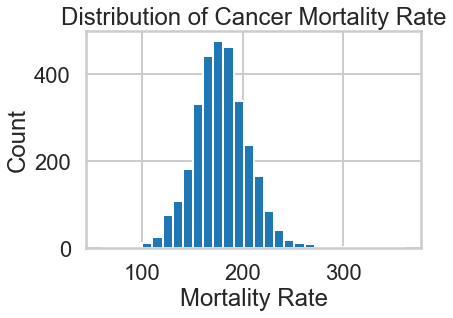

In [13]:
df_cancer.Deathrate.hist(bins=30)
plt.xlabel('Mortality Rate')
plt.ylabel('Count')
plt.title('Distribution of Cancer Mortality Rate');

In [14]:
df_cancer.describe()

,avgAnnCount,avgDeathsPerYear,Deathrate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,2895.000000,3047.000000,3047.000000,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,42.145323,2.479662,51.773679,18.224450,35.002068,6.158287,34.804660,13.282015,54.152642,7.852412,64.354939,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,5.292849,0.429174,6.896928,8.093064,9.069722,4.529059,7.034924,5.394756,8.315064,3.452371,10.647057,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,0.022100,23.100000,0.000000,0.000000,0.000000,7.500000,2.500000,17.600000,0.400000,22.300000,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,39.100000,2.370000,47.750000,12.800000,29.200000,3.100000,30.400000,9.400000,48.600000,5.500000,57.200000,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,42.400000,2.500000,52.400000,17.100000,34.700000,5.400000,35.300000,12.300000,54.500000,7.600000,65.100000,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,45.300000,2.630000,56.400000,22.700000,40.700000,8.200000,39.650000,16.100000,60.300000,9.700000,72.100000,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,65.700000,3.970000,72.500000,64.100000,72.500000,51.800000,54.800000,42.200000,80.100000,29.400000,92.300000,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


Text(0.5, 1.0, 'Cancer mortality rate by poverty percent')

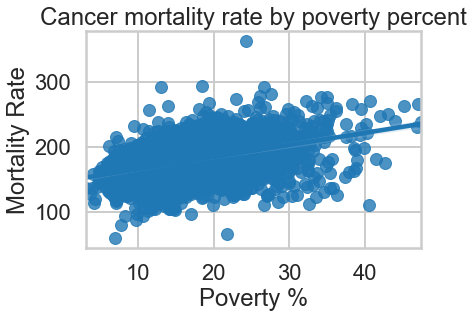

In [15]:
sns.regplot(y='Deathrate', x='povertyPercent', data=df_cancer, fit_reg = True)
plt.xlabel('Poverty %')
plt.ylabel('Mortality Rate')
plt.title('Cancer mortality rate by poverty percent')

### Number of counties by state

In [16]:
df_cancer['State'].value_counts()

Texas                   233
Georgia                 155
Virginia                125
Kentucky                120
Missouri                115
Illinois                102
Kansas                  102
North Carolina           99
Iowa                     99
Tennessee                95
Indiana                  92
Ohio                     87
Minnesota                87
Michigan                 83
Mississippi              82
Nebraska                 80
Oklahoma                 77
Arkansas                 75
Wisconsin                72
Pennsylvania             67
Florida                  66
Louisiana                64
Alabama                  63
New York                 62
Colorado                 60
South Dakota             59
California               57
West Virginia            55
North Dakota             51
Montana                  48
South Carolina           46
Idaho                    42
Washington               39
Oregon                   36
New Mexico               32
Utah                

In [17]:
#CAlculate average deathrate by state
state_deathrate_means = df_cancer.groupby('State')[['Deathrate']].mean()

In [18]:
state_deathrate_means.head()

,Deathrate
State,
Alabama,192.728571
Alaska,193.416667
Arizona,149.086667
Arkansas,200.090667
California,158.096491


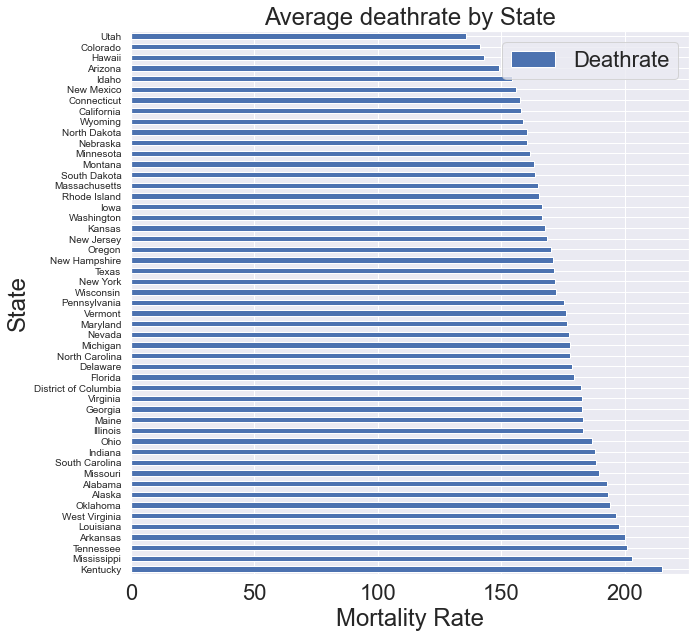

In [23]:
#Plot of deathrate by state
state_deathrate_means.sort_values(by='Deathrate', ascending=False).plot(kind='barh', figsize=(10, 10), title='Average deathrate by State')
plt.xlabel('Mortality Rate')
plt.yticks(fontsize=10);

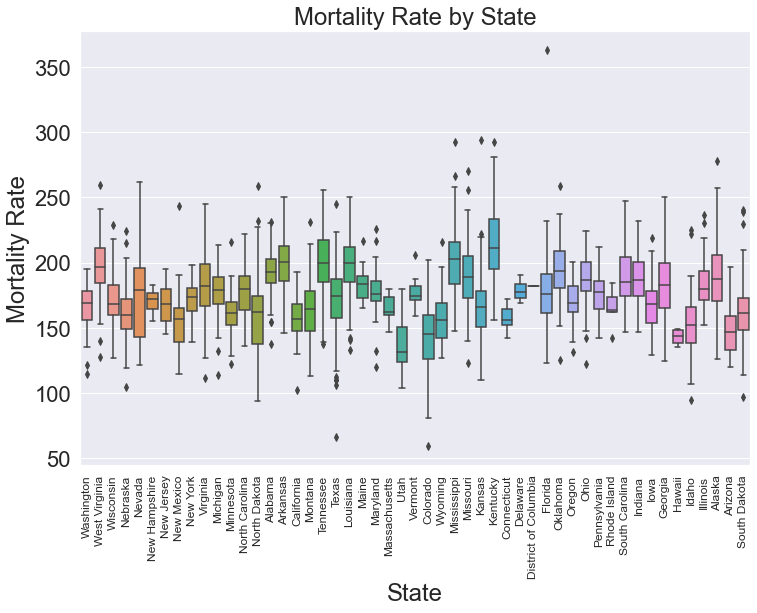

In [22]:
# boxplot of deathrate by state
plt.subplots(figsize=(12, 8))
sns.set(font_scale=2)
sns.boxplot(x=df_cancer["State"], y=df_cancer['Deathrate'], data=df_cancer)
plt.xticks(fontsize=12, rotation='vertical')
plt.ylabel('Mortality Rate')
plt.xlabel('State')
plt.title('Mortality Rate by State');

### Feature correlation heatmap

<AxesSubplot:>

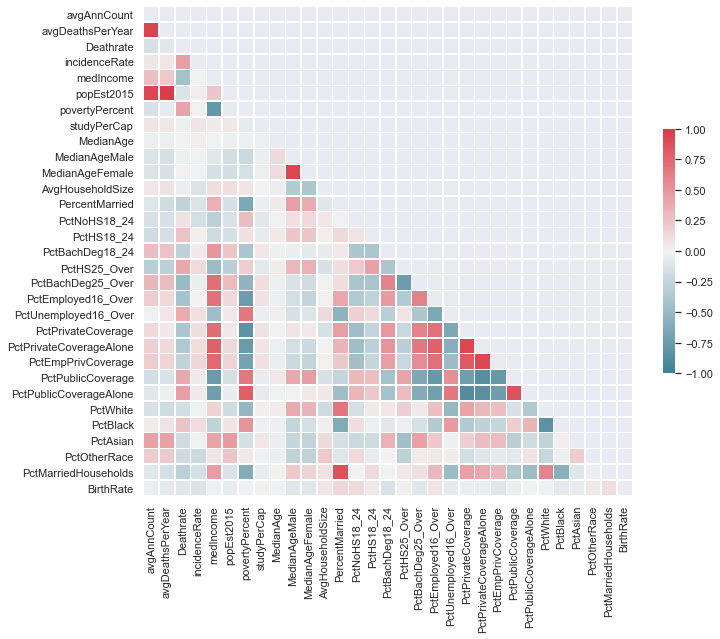

In [38]:
# correlation matrix
corr = df_cancer.corr()

# Generate a mask for the upper triangle; True = do NOT show
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
# More details at https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(
    corr,          # The data to plot
    mask=mask,     # Mask some cells
    cmap=cmap,     # What colors to plot the heatmap as
    annot=False,    # Should the values be plotted in the cells?
    vmax=1,       # The maximum value of the legend. All higher vals will be same color
    vmin=-1,      # The minimum value of the legend. All lower vals will be same color
    center=0,      # The center value of the legend. With divergent cmap, where white is
    square=True,   # Force cells to be square
    linewidths=.5, # Width of lines that divide cells
    cbar_kws={"shrink": .5},  # Extra kwargs for the legend; in this case, shrink by 50%
)


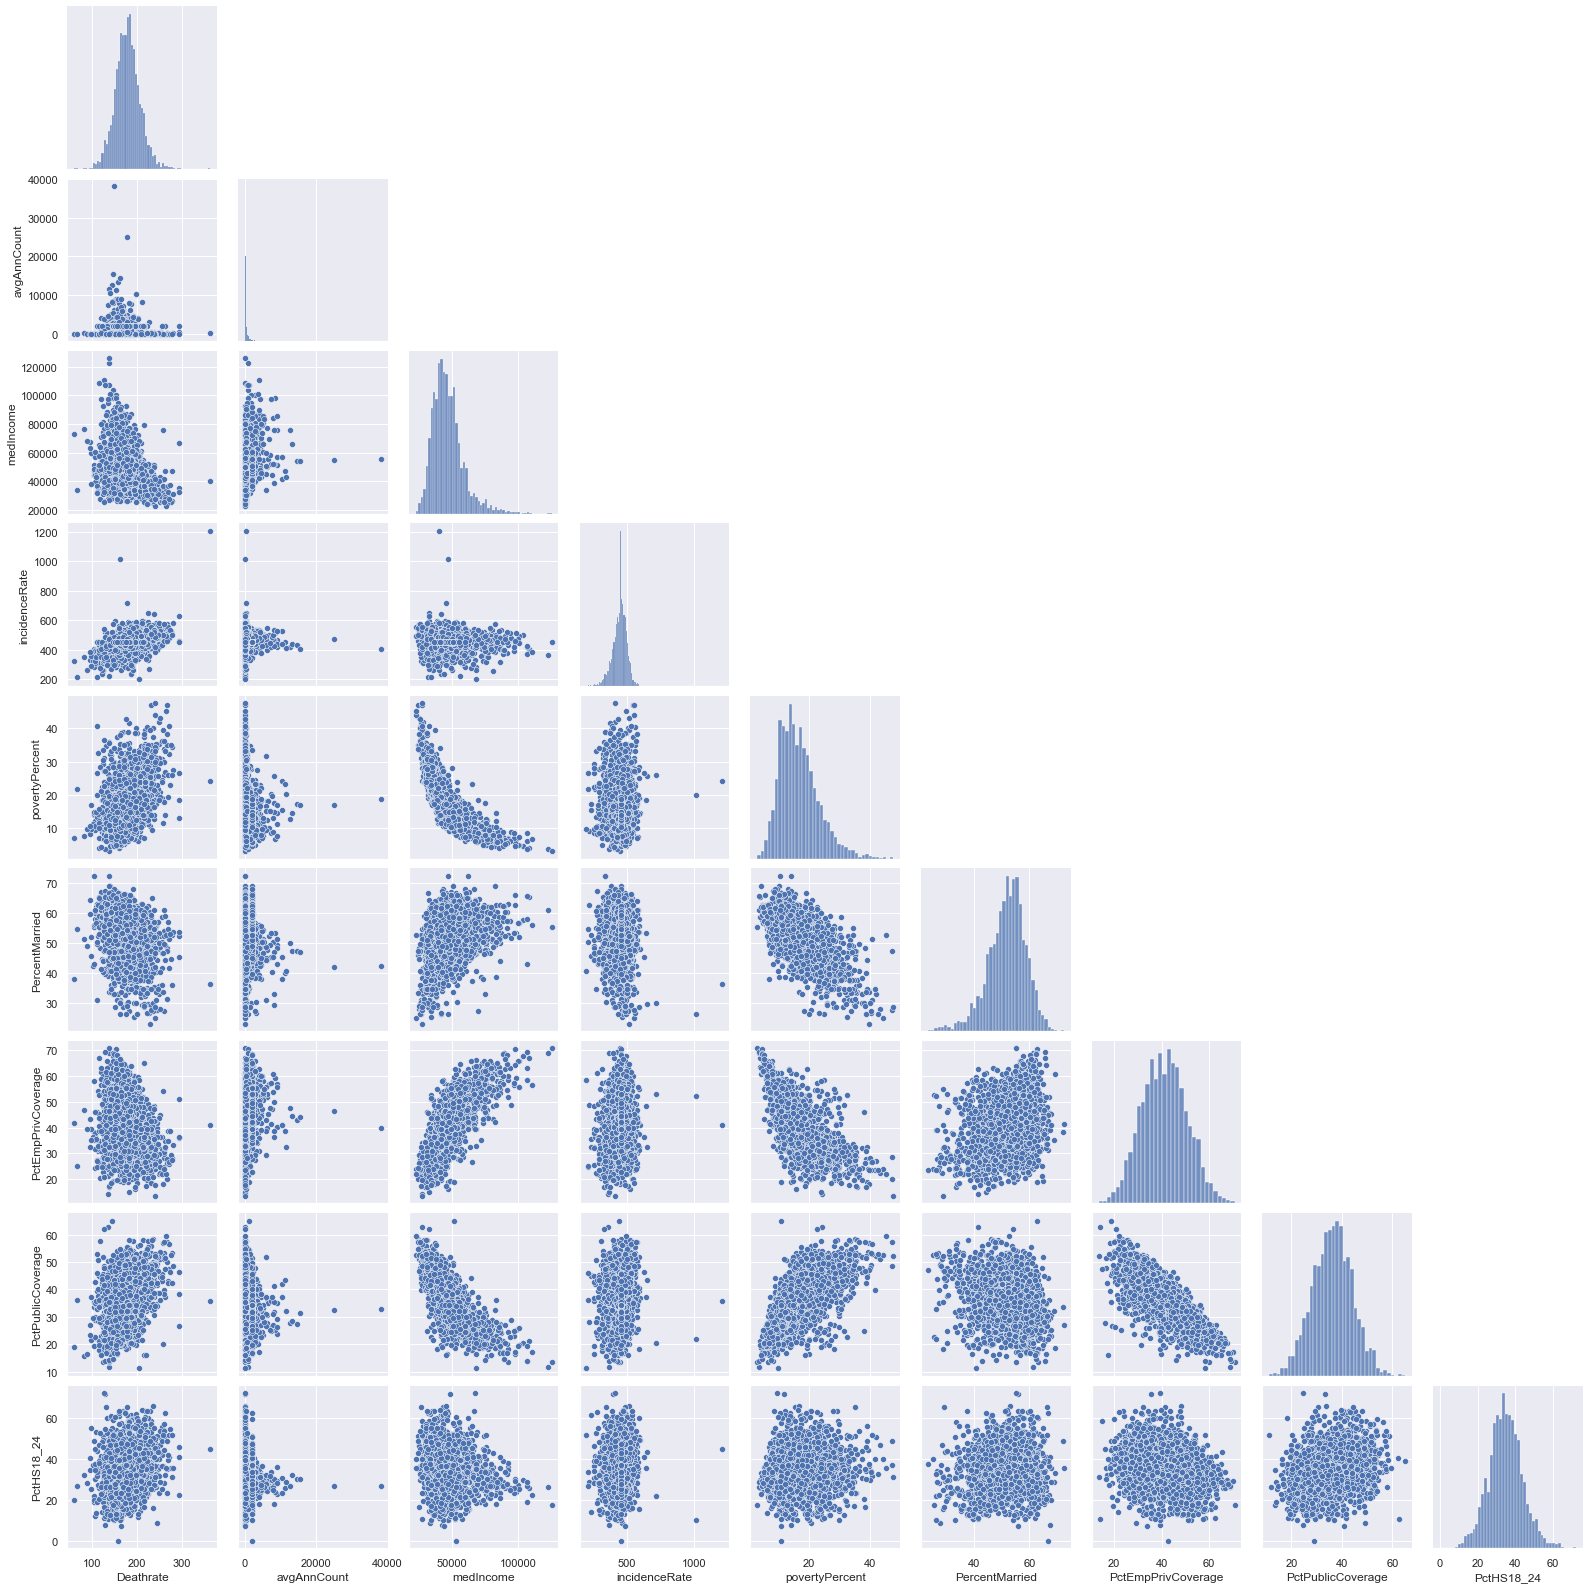

In [25]:
# Make a pairplot of the cancer data],
sns.set(rc={'figure.figsize':(15,30)})
sns.pairplot(df_cancer, x_vars=["Deathrate", "avgAnnCount", "medIncome", "incidenceRate", "povertyPercent", "PercentMarried","PctEmpPrivCoverage", "PctPublicCoverage", "PctHS18_24"], y_vars = ["Deathrate", "avgAnnCount", "medIncome", "incidenceRate","povertyPercent", "PercentMarried", "PctEmpPrivCoverage", 
                       "PctPublicCoverage", "PctHS18_24"], corner = True)
             

In [26]:
df = df_cancer.drop(columns=['County', 'State', 'binnedInc'])

In [27]:
df = df.fillna(df.median())

In [31]:

# Importing standardscalar module 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [29]:
# fitting
scalar = StandardScaler()
scalar.fit(df)
scaled_data = scalar.transform(df)

In [30]:
# Lcomponents = 2
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
  
x_pca.shape

(3047, 2)

Text(0, 0.5, 'Second Principal Component')

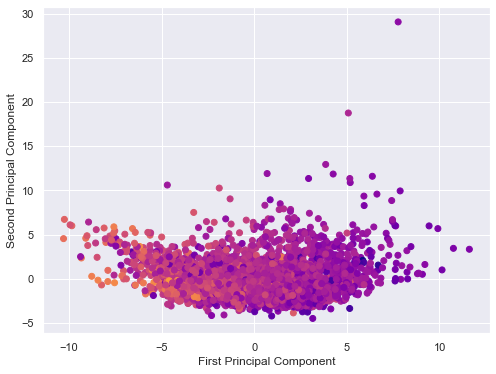

In [32]:
#  plot
plt.figure(figsize =(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = df['Deathrate'], cmap ='plasma')
  
# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [33]:
# components
pca.components_

array([[ 0.09505059,  0.07249756, -0.17571876, -0.00877046,  0.2842727 ,
         0.07717743, -0.28422838,  0.03115669, -0.00712709, -0.02507189,
        -0.0475486 ,  0.00064872,  0.15691679, -0.14401875, -0.1066296 ,
         0.19168079, -0.14850078,  0.24988376,  0.2725526 , -0.22440416,
         0.29359793,  0.27765865,  0.27375555, -0.28201303, -0.29170443,
         0.1299778 , -0.14420708,  0.11673223,  0.00594391,  0.16266753,
        -0.0027195 ],
       [ 0.26659075,  0.28865618, -0.00356228,  0.02586373,  0.04557749,
         0.29077938,  0.13891447,  0.03682582, -0.04355212, -0.28999973,
        -0.27771948,  0.12509702, -0.31095369, -0.05779542, -0.15257533,
         0.11072242, -0.23796277,  0.14310423,  0.00921206,  0.16199177,
        -0.0812816 ,  0.00423564,  0.02846397, -0.07509474,  0.06780827,
        -0.31269569,  0.22788181,  0.24587264,  0.15993551, -0.2557895 ,
        -0.03199712]])

In [34]:
df_comp = pd.DataFrame(pca.components_, columns = list(df))

In [35]:
df_comp.head()

,avgAnnCount,avgDeathsPerYear,Deathrate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,0.095051,0.072498,-0.175719,-0.008770,0.284273,0.077177,-0.284228,0.031157,-0.007127,-0.025072,-0.047549,0.000649,0.156917,-0.144019,-0.106630,0.191681,-0.148501,0.249884,0.272553,-0.224404,0.293598,0.277659,0.273756,-0.282013,-0.291704,0.129978,-0.144207,0.116732,0.005944,0.162668,-0.002719
1,0.266591,0.288656,-0.003562,0.025864,0.045577,0.290779,0.138914,0.036826,-0.043552,-0.290000,-0.277719,0.125097,-0.310954,-0.057795,-0.152575,0.110722,-0.237963,0.143104,0.009212,0.161992,-0.081282,0.004236,0.028464,-0.075095,0.067808,-0.312696,0.227882,0.245873,0.159936,-0.255789,-0.031997


<AxesSubplot:>

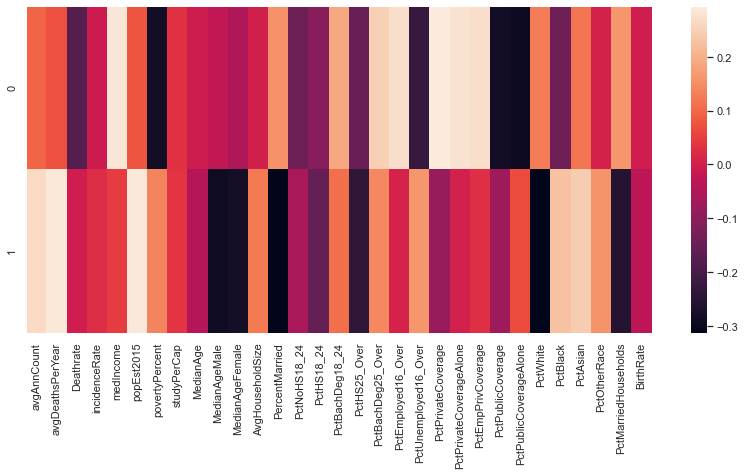

In [36]:
plt.figure(figsize =(14, 6))
  
# plotting heatmap
sns.heatmap(df_comp)